# EDA of Student Adaptability Level on Online Education
***

Online Education has become a buzzword since the COVID-19 hit the World. Most of the educational institutions went online to continue educational activities while developing countries like Bangladesh took a significant period of time to ensure online education at every education level. Students of several levels also faced many difficulties when they got introduced to online education. It is important for the decision makers of educational institutions to be informed about the effectiveness of online education so that they can take further steps to make it more beneficial for the students. Our main motivation is to contribute to this matter by analyzing the relevant factors associated with online education.

reference: https://www.researchgate.net/publication/355891881_Students'_Adaptability_Level_Prediction_in_Online_Education_using_Machine_Learning_Approaches or DOI: 10.1109/ICCCNT51525.2021.9579741

This dataset is available on: https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education

#### Goals: 
* Analyzing the relevant factors associated with online education.

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [3]:
data = pd.read_csv('students_adaptability_level_online_education.csv')
data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


## 1. Data Understanding

In [4]:
#print dataset shape
data.shape

(1205, 14)

The dataset contains 1205 rows and 14 columns

In [5]:
#print data type and null value for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


* There is no null data for each column 
* All columns are in object/categorical data type

In [4]:
#rename the columns into lower and without whitespace for easier later declaration
data.columns = data.columns.str.replace(' ', '-').str.lower()
data.columns

Index(['gender', 'age', 'education-level', 'institution-type', 'it-student',
       'location', 'load-shedding', 'financial-condition', 'internet-type',
       'network-type', 'class-duration', 'self-lms', 'device',
       'adaptivity-level'],
      dtype='object')

### 1.1. Statistical Summary

Here, we try to inspect value counts by describe method and countplot.

In [10]:
#print statistical summary for each column
data.describe()

,gender,age,education-level,institution-type,it-student,location,load-shedding,financial-condition,internet-type,network-type,class-duration,self-lms,device,adaptivity-level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


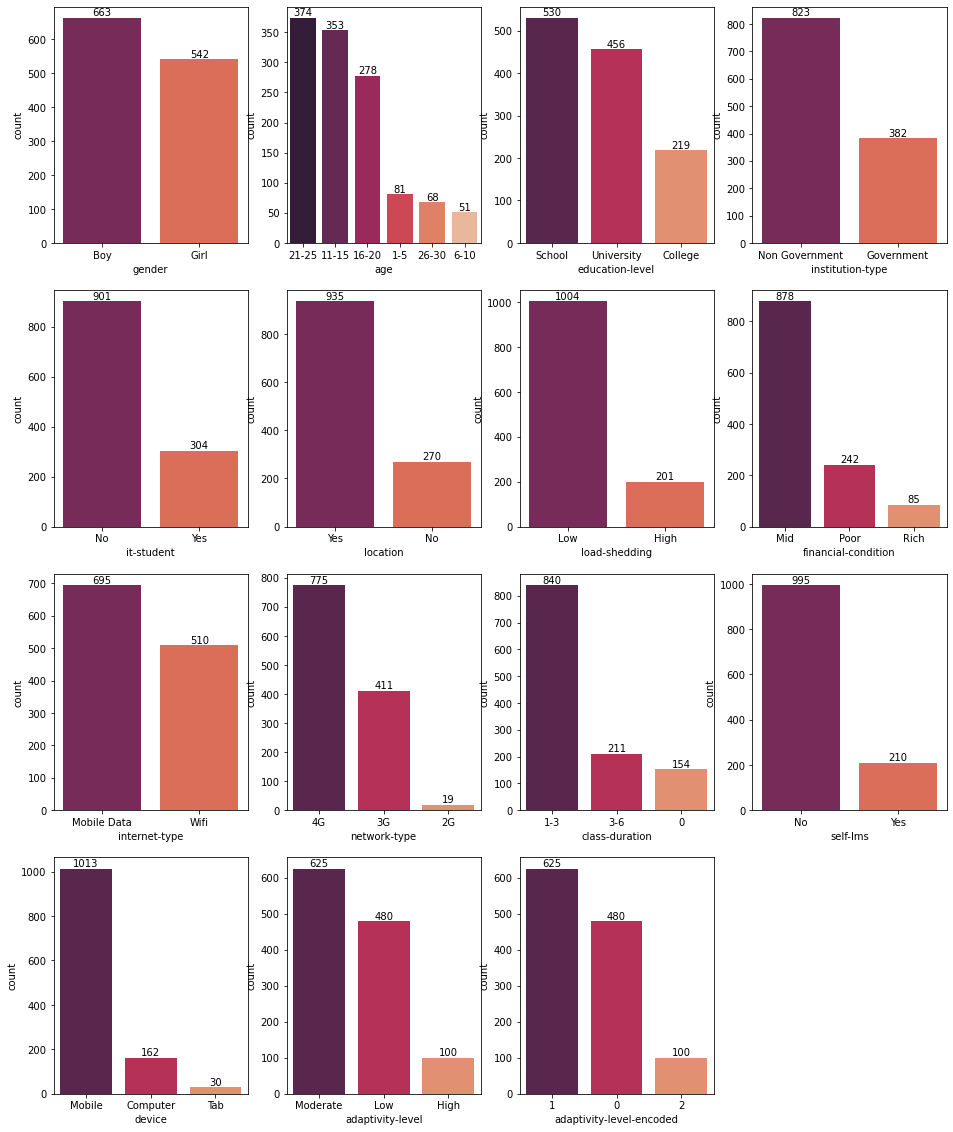

In [92]:
#print value counts for each column using countplot
plt.figure(figsize=(16, 20))

for i in range(len(data.columns.tolist())):
    plt.subplot(4, 4, i+1)
    ax = sns.countplot(data=data, x=data.columns.tolist()[i], order=data[data.columns.tolist()[i]].value_counts().index, palette='rocket')
    plt.xlabel(data.columns.tolist()[i])
    plt.bar_label(ax.containers[0])
    plt.tight_layout

**Observation**:

* *gender*: There are more boys than girl students in this dataset.


* *age*: There are more students in age 21-25 than other age groups. 11-15 and 16-20 follows after that. Look most students here are in the age of 11-25, i.e. schooling period from elementary school to university. This will be validated by next column.


* *education-level*: There are 3 different levels, i.e. school, college, and university. Often we interchange the terms of 'college' and 'university' in our country, but in Bangladesh apparently college is lower than university. There are more students sit in school than other levels in this dataset, but does not have huge difference between each other.


* *institution-type*: this column tells us about the institution type where the students learn. Non-gevernmental institution has more students, twice more than geovernmental institution.


* *it-students*: most students are currently studying in IT, which could mean most students are internet savvy enough for online education. They figure three times more than non-IT students.


* *location*: this column tells us whether the students' location is in town/urban or not. Most students are located in town/urban, three times more than in sub-urban/countryside. Their locations could imply us about internet connectivity and reliability which are essential for online education.


* *load-shedding*: Load Shedding happens when there is not enough electricity available to meet the demand of all customers, and an electricity (public) utility will interrupt the energy supply to certain areas. Low load shedding means low internet connectivity interruption, which is good. While high load shedding could harm online education process. Here, around 80% students only have low load shedding, which is quite good for overall online education process.


* *financial-condition*: Most students come from middle class in terms of financial, which is almost three times more than poor and rich financial. this financial situation could tell us about students' affordability of internet connection and online material, which indirectly relate to their adaptivity level.


* *internet-connection*: There are more students connect with mobile data than with wifi by almost 200 figures.


* *network-type*: There are much more students who have been able to connect by 4G, than in 3G and 2G. Higher type leads to faster connectivity which is necessary for online education moreover for real-time connection.


* *class-duration*: Most online education is held for 1-3 hours. longer class duration could influence higher internet data consumption and lower concentration for students, which expectedly effect adaptivity level.


* *self-lms*: this column tells us about the platform that is used for online education by the learning institution, which turns out most of the students (80%) still do not learn in their own institutions' lms, possibly prefer to common online platforms that have been widely used.


* *device*: Most of the students (>80%) use mobile device for online learning, than computer or tab. This one is quite surprising for us since the convenience of computer for online learning usually tops mobile device. This may direct to the compuer ownership, which could direct to financial condition.


* *adaptivity-level*: There are more students have moderate level of adaptivity, then low, then high. The students with high adaptivity level are much less than others, only about 100 students (<10%). 


This is huge task for us to increase the students' adaptivity level to enhance online education. Next, we will dive deep and analyze the relevant factors that could improve the situation and build the action recommendation for stakeholders. 

### 1.2. Bivariate Analysis (Adaptivity Level)

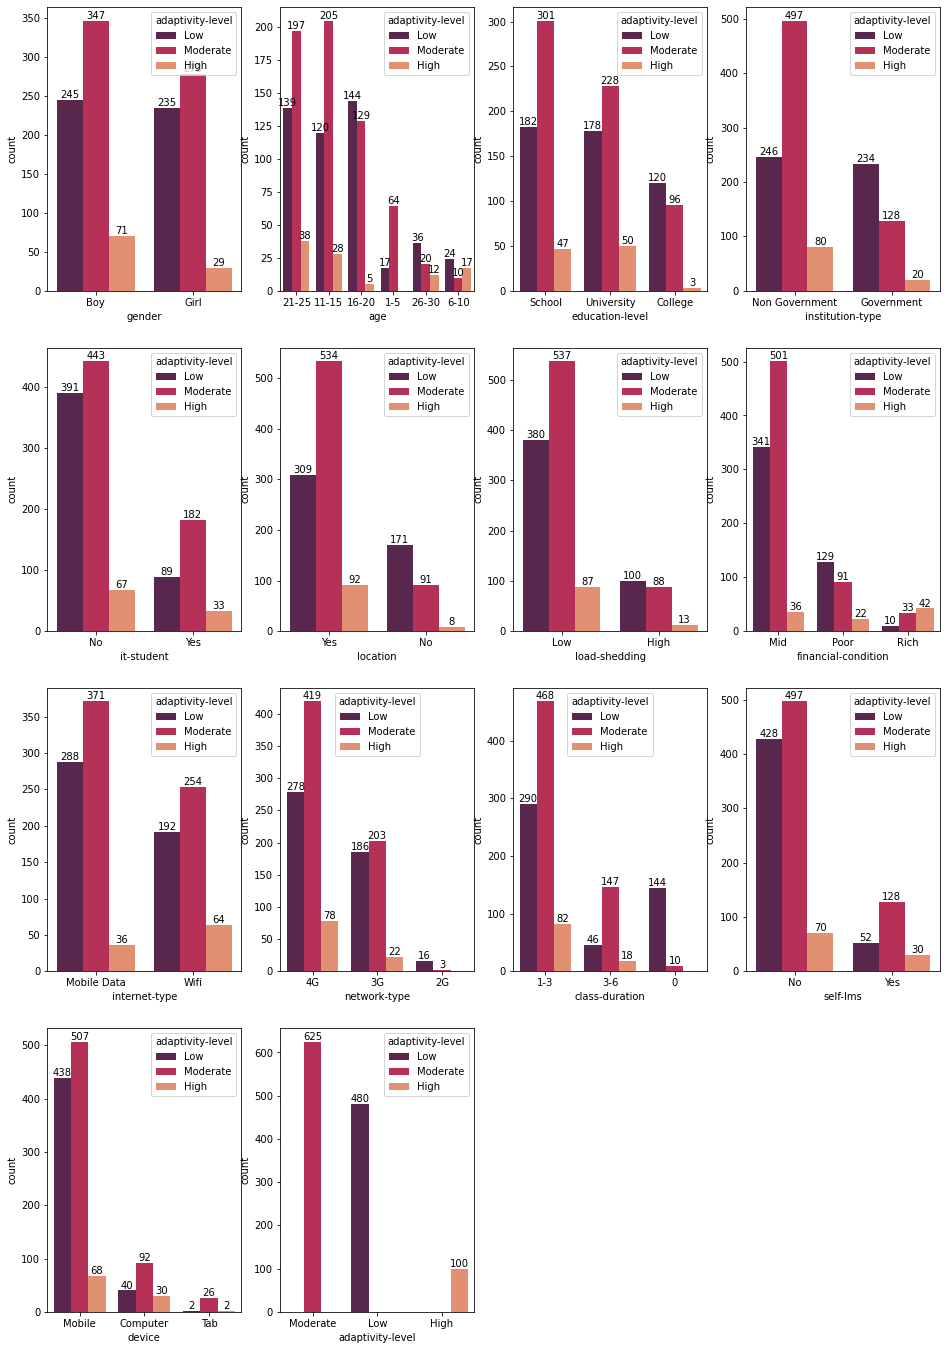

In [11]:
#print value counts for each column using countplot
plt.figure(figsize=(16, 24))

for i in range(len(data.columns.tolist())):
    plt.subplot(4, 4, i+1)
    ax = sns.countplot(data=data, x=data.columns.tolist()[i], order=data[data.columns.tolist()[i]].value_counts().index, 
                       hue = 'adaptivity-level', hue_order=['Low', 'Moderate', 'High'], palette='rocket')
    plt.xlabel(data.columns.tolist()[i])
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])
    plt.bar_label(ax.containers[2])
    plt.tight_layout

**Observation**:

* *gender*: overall, there are more moderate adaptive students, than low, than high. There is no huge difference between boys and girls, so we can exclude them into further analysis.


* *age*: There are different proportions between age groups.
    * 1 - 5: There are more moderate adaptive level than low, but there is none who have high adaptive level. It is quite understable knowing it is their new learning experience.
    * 6 - 10: The proportion of lower level of adaptivity is higher than others, followed by high and moderate. this is unique than other age groups. Probably at this age, the adaptivity level has more influence from another factor.
    * 11 - 15: They have common proportion between low, moderate, and high level of adaptivity. There are more students with moderate level than other levels.
    * 16 - 20: There are more students with low adaptivity level, followed by moderate and high. By this age, they usually is transitioned from school to college and university. It should be questioned why they tend to have lower level of adaptivity than other age groups.
    * 21 - 25: They have similar pattern with 11 - 15 age group.
    * 26 - 30: they have similar pattern with 16 - 20 age group, but with higher amount who have high adaptivity level. 
    We should be curious since there is no linear between age group and adaptivity level.


* *education-level*: school and university have a similar pattern on adaptivity level, more students have moderate level, followed by low and high. But university students have highest amount of high adaptivity level. While most college students have lower adaptivity level.


* *institution-type*: overall, non-governmental institution have higher adaptivity level than govt institution. There are more lower adaptive students who learn in the govermental institution.


* *it-students*: between it students or not, they have similar pattern. But IT students have higher percentage of high adaptive level and lower percentage of low adaptive level. We can see that the students who learn IT have higher rate of higher mid level of adaptivity on online education.


* *location*: Obviously, the students who live in town have much higher adaptivity level than who live in sub-urban. The sub-urban students have much lower adaptivity level, only 8 students who have high adaptivity. We really need to improve the sub-urban students. We need to see their problem and condition.


* *load-shedding*: the students who have high load shedding, have lower adaptivity level. Load shedding sure effect adaptivity level.


* *financial-condition*: this one is unique, the students who have poor financial condition, have lower adaptivity level.  While the mid financial condition have more moderate adaptive level students. The higher financial condition, the higher adaptive level the students will achieve.


* *internet-connection*: Between mobile data and wifi, they have similar pattern on adaptivity level. But there are more high adaptive level students who use wifi than mobile data.


* *network-type*: the higher generation of network type, the higher adaptivity level will the students achieve. The students who use 2G network type have much lower adaptivity level. The online learners may have at least 3G network type to achieve higher adaptivity level.


* *class-duration*: The class duration 1-3 and 3-6 hours have similar pattern of adaptivity level, but less than 1 hour has very low adaptivity level. We could say that less than 1 hour learning is not quite good for online learning and lower the adaptivity level of the students.


* *self-lms*: There is no obvious difference between self-lms and non-self-lms, but the utilization of self lms significantly improve significant number of students' adaptivity level.


* *device*: Mobile and caomputer have similar proportion of moderate level students. But computer have lower proportion of low adaptivity level than mobile. While almost all tab users have moderate level. We can say that using computer could suppress the amount of low adaptivity level students.

**Summary**

* There is no linear correlation between age group and adaptivity level. Each age group have unique adapativity level proportion. To improve adaptivity, we must conduct further analysis for each age group.
* Most of college students have low adaptivity level.
* Non-governmental institution have higher adaptivity level than govt institution. 
* IT students have higher adaptivity level, probably because they have more savvyness on internet and technology
* The sub-urban students have much lower adaptivity level than urban students.
* The high load-shedding could harm the online education activity, which is seen here lower the adaptivity level of the students.
* The higher financial condition, the higher adaptivity level the students will achieve. We must concern more on the students who have poor financial condition.
* There is no significant difference between mobile data and wifi on adaptivity level.
* The students may have at least 3G network type to achieve higher adaptivity level on online education.
* The online class could only be effective if it spans into more than 1 hour. Less than that, the students' adaptivity level would be low.
* The utilization of self lms significantly improves the students' adaptivity level.
* The most effective device used for online learning is computer, followed by tab, than mobile.

## 2. Exploratory Data Analysis on Adaptability Level

### 2.1. Deep Dive Questions

Here, we try to ask some questions to comprehend our dataset more and extract some genuine information that is valuable for the necessary action to improve the students' adaptability level.

1. How is the adaptivity level based on age and education level?
2. Does IT students have significant higher adaptivity level?
3. How is the correlation between financial condition and adaptivity level? How does their internet access, i.e. internet type and network type affect this? 
4. How does the location and load shedding affect on the adaptivity level?
5. How is the adaptivity level based on location and learning institution type?
6. How does the class duration effect the adaptivity level? Also need to look another relevant factor such as education level and age.
7. Which institution has provided self lms? Does self lms effect the adaptivity level?
8. What is the profile of the students with lower adaptivity level in terms of internet connection, load shedding, network type, and device?

### 2.2. Discussion and Analysis

### Q1. The adaptivity level based on age and education level

We want to rank the adaptivity level based on age and education level to find which age group and education level we need to improve their adaptivity level. 

We will conduct ordinal encoding for adaptivity level, with 0 = low, 1 = moderate, and 2 = high.

In [12]:
#ordinal encoding for adaptivity level column
level_class = {'Low':0, 'Moderate':1, 'High':2}
data['adaptivity-level-encoded'] = data['adaptivity-level'].map(level_class)

data.head()

,gender,age,education-level,institution-type,it-student,location,load-shedding,financial-condition,internet-type,network-type,class-duration,self-lms,device,adaptivity-level,adaptivity-level-encoded
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate,1
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate,1
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate,1
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate,1
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low,0


In [18]:
#print a pivot table
data.pivot_table(index=['age', 'education-level'], values='adaptivity-level-encoded', aggfunc='mean').sort_values('adaptivity-level-encoded', ascending=False)

adaptivity-level-encoded
age   education-level                          
6-10  School                           0.862745
1-5   School                           0.790123
21-25 University                       0.752841
11-15 School                           0.739377
26-30 University                       0.647059
16-20 School                           0.577778
      University                       0.527778
      College                          0.477157
21-25 College                          0.363636

After encoding, we can classify adaptivity-level into four groups:
1. low = 0 - 0.5
2. lower mid = 0.51 = 1
3. upper mid = 1.1 - 1.5
3. high = 1.51 - 2


**Observation**

* The students who learn in college level have lower adaptivity level than others. 
* For every age group, the students who learn in school level have the highest adaptivity level, after that university.

**Analysis**

In context of online education, we assume that we have much similarity on learning methods. Online class in front od device, not much dialogue between teachers and students, and online assignment. So, the difference between school, college, and university is usually in terms of material depth and characteristics. 

School teaches the basic, college teaches more advanced and practical material for specific knowledge, while university offers more advanced material and research experience for specific expertise. Here, we can conclude that basic material for school is the most suited and the easiest for online education. 

We could almost say the same for university. But for the freshman-sophomore (usually 18-20 years in university) have lower adaptivity level may because they need the real world introduction for their new learning environment. The transition from school to university is probably not well handled by online education.

While for college, bacause their learning material is usually much more practical. That is why online learning currently lower their adaptivity level. Their mmore practical learning material is probably the less suited to be conducted by online learning.

### Q2. The difference of adaptivity level for IT students and non-IT students

Does IT students have significant higher adaptivity level?

Here, we will conduct a hypothesis testing. Because both columns are categorical, we will conduct chi-square test.

**Hypothesis*

H0 = There is no difference between IT students and non-IT students in terms of adaptivity level

H1 = There is significant difference between IT students and non-IT students in terms of adaptivity level

with the significancy level 95%

In [22]:
#chi-square hypothesis test

chisqt = pd.crosstab(data['it-student'], data['adaptivity-level'], margins=True)

from scipy.stats import chi2_contingency 

value = np.array([chisqt.iloc[0][0:5].values, chisqt.iloc[1][0:5].values])
stat, p, dof= chi2_contingency(value)[0:3] 
significance_value = 0.05

print("p value: " + str(p)) 
if p <= significance_value: 
    print('There is significant difference between IT students and non-IT students in terms of adaptivity level') 
else: 
    print('There is no difference between IT students and non-IT students in terms of adaptivity level')

p value: 0.00020571204525442465
There is significant difference between IT students and non-IT students in terms of adaptivity level


From the hypothesis testing we have conducted above, it concluded that there is significant difference between IT students and non-IT students in terms of adaptivity level. It because the IT students have more savvyness on internet and online learning platforms.

### Q3. How is the correlation between financial condition and adaptivity level? How does their internet access, i.e. internet type and network type affect this?

First, we try to look further on the proportion of various adaptivity level in poor, mid, and rich students.

Text(0.5, 0, 'Adaptivity Level for Rich')

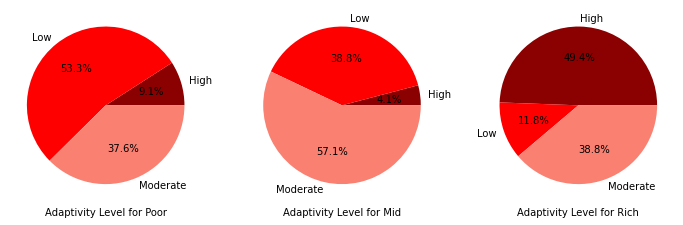

In [100]:
plt.figure(figsize=(12, 6))
#colors = ['darkorchid', 'mediumorchid', 'orchid', 'thistle']
colors = ['darkred', 'red', 'salmon', 'mistyrose']

#create new dataframe for poor financial condition
poor = data[data['financial-condition']=='Poor']
poor_al = poor.groupby('adaptivity-level').size().reset_index()
#plot a pie chart
plt.subplot(1, 3, 1)
plt.pie(poor_al[0], labels=poor_al['adaptivity-level'], autopct='%1.1f%%', colors=colors)
plt.xlabel('Adaptivity Level for Poor')

#create new dataframe for mid financial condition
mid = data[data['financial-condition']=='Mid']
mid_al = mid.groupby('adaptivity-level').size().reset_index()
#plot a pie chart
plt.subplot(1, 3, 2)
plt.pie(mid_al[0], labels=mid_al['adaptivity-level'], autopct='%1.1f%%', colors=colors)
plt.xlabel('Adaptivity Level for Mid')

#create new dataframe for rich financial condition
rich = data[data['financial-condition']=='Rich']
rich_al = rich.groupby('adaptivity-level').size().reset_index()
#plot a pie chart
plt.subplot(1, 3, 3)
plt.pie(rich_al[0], labels=rich_al['adaptivity-level'], autopct='%1.1f%%', colors=colors)
plt.xlabel('Adaptivity Level for Rich')

We can see that the better financial condition, the higher adaptivity level. Most of poor students have low adaptivity level, by 53,3%. Most of middle-financial students have moderate adaptivity level, by 57.1%, and most of rich students have high adaptivity level, by 49.4%.

It is a common knowledge that the better financial condition, the higher ability to pay more for online education and its support infrastructure, like internet access, higher quality of school and learning material, and learning device.

Text(0.5, 0, 'Adaptivity Level for 4G')

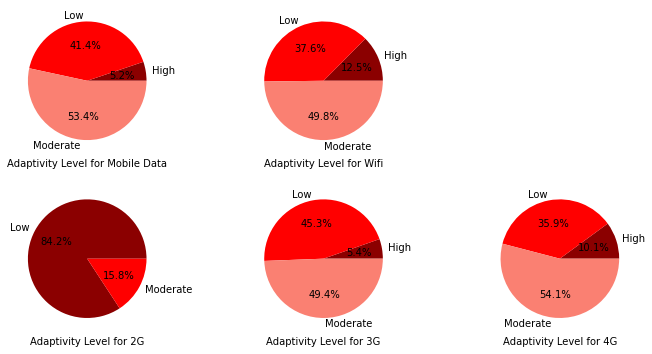

In [101]:
plt.figure(figsize=(12, 6))

#create new dataframe for mobile data
mobiledata = data[data['internet-type']=='Mobile Data']
mobiledata = mobiledata.groupby('adaptivity-level').size().reset_index()
#plot a pie chart
plt.subplot(2, 3, 1)
plt.pie(mobiledata[0], labels=mobiledata['adaptivity-level'], autopct='%1.1f%%', colors=colors)
plt.xlabel('Adaptivity Level for Mobile Data')

#create new dataframe for Wifi
wifi = data[data['internet-type']=='Wifi']
wifi = wifi.groupby('adaptivity-level').size().reset_index()
#plot a pie chart
plt.subplot(2, 3, 2)
plt.pie(wifi[0], labels=wifi['adaptivity-level'], autopct='%1.1f%%', colors=colors)
plt.xlabel('Adaptivity Level for Wifi')

#create new dataframe for 2G
twog = data[data['network-type']=='2G']
twog = twog.groupby('adaptivity-level').size().reset_index()
#plot a pie chart
plt.subplot(2, 3, 4)
plt.pie(twog[0], labels=twog['adaptivity-level'], autopct='%1.1f%%', colors=colors)
plt.xlabel('Adaptivity Level for 2G')

#create new dataframe for 3G
threeg = data[data['network-type']=='3G']
threeg = threeg.groupby('adaptivity-level').size().reset_index()
#plot a pie chart
plt.subplot(2, 3, 5)
plt.pie(threeg[0], labels=threeg['adaptivity-level'], autopct='%1.1f%%', colors=colors)
plt.xlabel('Adaptivity Level for 3G')

#create new dataframe for 4G
fourg = data[data['network-type']=='4G']
fourg = fourg.groupby('adaptivity-level').size().reset_index()
#plot a pie chart
plt.subplot(2, 3, 6)
plt.pie(fourg[0], labels=fourg['adaptivity-level'], autopct='%1.1f%%', colors=colors)
plt.xlabel('Adaptivity Level for 4G')

From the pie chart above, we can see that the students who use wifi have higher adaptivity level overall than who use mobile data. The high level students with wifi is 12.5%, compared to 5.2% in mobile data. And also the low level students with wifi is 37.6%, lower than 41.4% in mobile data.

Network type affect on the internet access reliability. Online learning usually given by video or real-time streaming, which need faster and more reliable internet network. the higher level of network type also increase the adaptivity level of students. No high adaptivity level students use 2G network. The highest level of network type, i.e. 4G also have the highest amount of high adaptive students.

We will see the influence of internet access (internet type and network type) for adaptivity level in each financial condition below.

**Poor**

<AxesSubplot:xlabel='internet-type,network-type'>

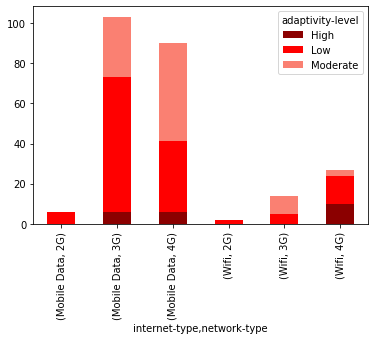

In [99]:
#make a pivot table
poorpivot = poor.pivot_table(index=['internet-type', 'network-type'], columns='adaptivity-level', values='adaptivity-level-encoded', aggfunc='count')

colors = ['darkred', 'red', 'salmon', 'mistyrose']
poorpivot.plot(kind='bar', stacked=True, color=colors)

Most of the students use mobile data for online learning. The 2G users have low adaptivity level, so this network type should not be used anymore for learning. We must provide better network type for higher adaptivity level on online education. The higher network type level, the low adaptivity level students also decrease. We can see that there are more high adaptive level students use wifi and 4G than other internet type and network type. 

**Mid**

<AxesSubplot:xlabel='internet-type,network-type'>

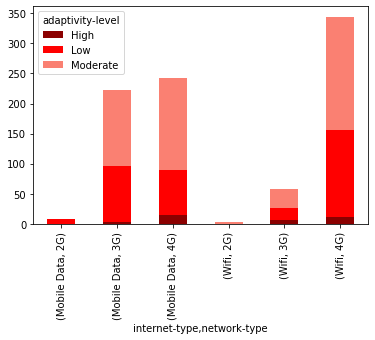

In [102]:
midpivot = mid.pivot_table(index=['internet-type', 'network-type'], columns='adaptivity-level', values='adaptivity-level-encoded', aggfunc='count')
midpivot.plot(kind='bar', stacked=True, color=colors)

Most of mid-financial-condition students already have 4G network for their online education, which is good. There are more students have used wifi instead of mobile data for 4G network. We can see that the proportion of moderate adaptive level is highest in 4G Wifi. 

**Rich**

<AxesSubplot:xlabel='internet-type,network-type'>

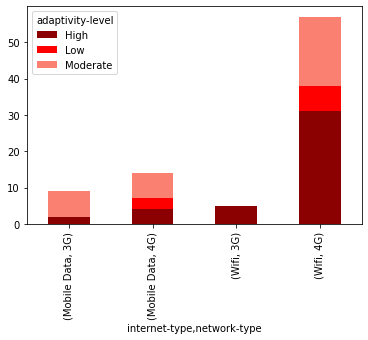

In [103]:
richpivot = rich.pivot_table(index=['internet-type', 'network-type'], columns='adaptivity-level', values='adaptivity-level-encoded', aggfunc='count')
richpivot.plot(kind='bar', stacked=True, color=colors)

There is no more rich students use 2G network for their online learning. Most of them have already use 4G and provided by Wifi. We can see that the students who use 4G and Wifi have the highest adaptivity level than others.

**Analysis**

The rich students generally have the highest adaptivity level, while the poor students have the lowest adaptivity level. It is because the better financial condition of the students, they can afford to access higher quality of internet. 4G network is the the highest level of network type, and also lead to higher adaptivity level. Between mobile data and wifi, wifi has more students with higher adaptivity level. 

To improve the adaptivity level, we can do some practices:
* Provide at least 3G network for all the students, because 2G is very unreliable for online learning.
* Provide more 4G network internet that is affordable for all financial level students.
* Most of the students afford at least 3G and mobile data. We can see rich students profile, most of them use wifi that has been in 4G. We can build public free wifi that has provided 4G network. It is free, so it is affordable for the low financial students. It surely could improve their adaptivity level.

### Q4. How does the location and load shedding affect on the adaptivity level?

From bivariate analysis in the data understanding, we can see that there are more students who have high adaptivity level live in urban rather than in sub-urban. The sub-urban students generally have lower adaptivity level. 

We also see similar pattern in load-shedding category. There are more students who have high adaptivity level only have low load shedding. The students with high load shedding generally have lower adaptivity level.

So, we need to see their correlation by countplot.

[Text(0, 0, '110'), Text(0, 0, '91')]

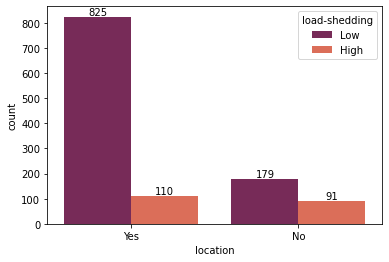

In [82]:
#draw a countplot
ax = sns.countplot(data=data, x='location', hue='load-shedding', palette='rocket')
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])

[Text(0, 0, '91'), Text(0, 0, '179'), Text(0, 0, '110'), Text(0, 0, '825')]

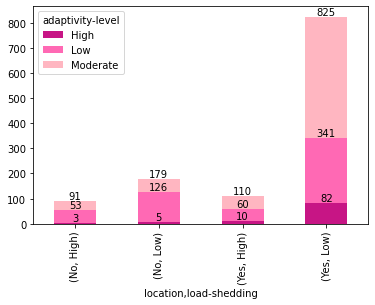

In [106]:
pivot2 = data.pivot_table(index=['location', 'load-shedding'], columns='adaptivity-level', values='adaptivity-level-encoded', aggfunc='count')

colors = ['mediumvioletred', 'hotpink', 'lightpink']
ax = pivot2.plot(kind='bar', stacked=True, color=colors)
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.bar_label(ax.containers[2])

Most students who live in town have low load shedding, means they face low internet connection interruption which is really necessary for better experience on online learning and higher adaptivity level. 

High load shedding certainly will frustate the students' online learning experience which is decreasing their adaptivity level. We can see that the students who live in sub-urban with high load shedding have higher proportion, figures about 30%, compared with the students in town that only about 10%. 

For sub-urban students, the low load shedding does not increase the adaptivity level. But for urban students, the low load shedding surely increase the adapativity level by eight times! The influence of load shedding here only effects the urban students. 

But, does the network availibility in urban/sub-urban effect this? Let's check it out!

[Text(0, 0, '5'), Text(0, 0, '14')]

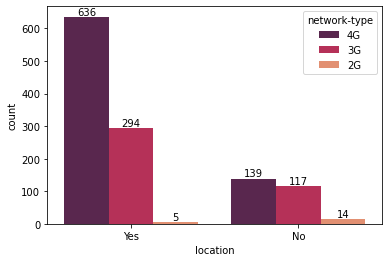

In [84]:
#draw a countplot
ax = sns.countplot(data=data, x='location', hue='network-type', palette='rocket')
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.bar_label(ax.containers[2])

We can see that there is no huge difference on network availibility in both urban and sub-urban. So we don't need further analysis on network availibity in the location.

**Analysis**

There are more students with high adaptivity level live in town. This is because they only have lower percentage of load shedding, so they have fewer events of connection interruption in online learning. The high load shedding has higher percentage for sub-urban students, but does not effect much on the adaptivity level. So the problem of load shedding has bigger impact for urban students. The better, low load shedding increase the adaptivity level by eight times!

What we need to prioritize is improve internet service to prevent load shedding in urban area for better learning experience and higher adaptivity level.

## 3. Conclusion and Recommendation

### 3.1. Conclusion

1. The most students with higher adaptivity level found in the school and university. The college student have the lowest adaptivity level (0.41 from 3) due to their more practical and more specific material in nature. The early level university students also have low adaptivity level due to the transition between school and university, so they need more real world orientation and asjustment in their new academic environment.  


2. There is significant difference on the adaptivity level between IT students and non-IT students.


3. The better financial level, the higher adaptivity level will the students achieve. This is because they can afford much better internet connectivity. The internet for poor students is mostly provided with mobile data and 3G. The mid has been momstly provided with 4G, both mobile data and WiFi. Lastly, the rich students have mostly used Wifi and been provided with 4G, no one used 2G. 


4. The 2G network type is the least effective to serve online learning. To improve the adaptivity level, the students should not use 2G network. The higher network type, the higher adaptivity level. The internet service with WiFi and 4G connection is the best. 


5. There are more students who live in town have high adaptivity level than who do not live in town. The sub-urban students fortuitously suffers higher load shedding, but this does not effect much on their learning effectivity and adaptivity level. The load shedding or internet connection interruption just effect on urban students. The low load shedding leads to better learning experience and improve the adaptivity level by approximately 8 times.

### 3.2. Recommendation

**For online learning institution**

* Online learning is the most suited for basic and fundamental knowledge like the material for school and university. The students have already upper middle adaptivity level, so we need to emphasize and improve the content for the school and university material. 


* For more exploration, we should try to cover the online learning material for college and find the best way to to present it. There must be a further research on college learning material.  


* Since IT students have significantly higher adaptivity level, online learning is not really a problem for them. We need to present more various IT-related learning material.


* There are various level of internet access based on the students' financial condition. The more advanced learning service, such as video live streaming, the higher internet and network capability required. To cover all students, we should offer various package of learning material. We can offer premium, standard, and basic level of online learning material and facility that is adjusted by financial condition and internet access affordability.
    * Premium package, for the most expansive learning material and most advanced learning experience like real time video learning, real time one-on-one discussion, and advanced tools. Which requires high amount of data and the best internet connectivity.
    * Standard package, with almost the same facility as the premium but the real time one-on-one discussion and standard tools which requires less data and friendly for mobile data internet users.
    * Basic package, with the similar expansive learning material but adjusted with the lower internet data service, like using video on demand, discussion in chat, and widely used learning platform service, like YouTube, etc.

**For government**

* We need an improvement of internet service, provide at least 3G network in all student areas because 2G is very unreliable. 


* We need to provide cheaper 4G internet service since it is much needed in online education that is currently being the most common practices everywhere in the country. We can provide it by building free WiFi with 4G network for public access so all students, especially poor-financial students can utilize it to improve their adaptivity level.


* High load shedding is happening more in sub-urban students, but that does not mean it is not a problem for urban students. The low load shedding has more significant influence for the urban students, improving 8 times of their adaptivity level. So we should prioritize to handle the load shedding in urban area by providing a sufficient amount of electricity to meet the demand for online learning and other online activity which is currently and widely used now. 